In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("data/heart_diagnose.csv")

In [39]:
df.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


1

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

2

In [41]:
cat_list = []
for col in df.columns:
    if df[col].nunique() < 5 and df[col].nunique() > 2:
        cat_list.append(col)
        print(f"{col}: ", df[col].nunique())

pain type:  4
resting electrocardiographic results:  3
slope of peak:  3
num of major vessels:  4
thal:  3


In [42]:
import sklearn as sk
def encode_and_bind(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [43]:
cat_list = ['pain type', 'thal']
for col in cat_list:
    df = encode_and_bind(df, col)

In [44]:
df.head()

,age,sex,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease,pain type_four,pain type_one,pain type_three,pain type_two,thal_fixed defect,thal_normal,thal_reversable defect
0,70,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,1,1,0,0,0,0,1,0
1,67,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,0,0,0,1,0,0,0,1
2,57,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1,0,0,0,1,0,0,1
3,64,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0,1,0,0,0,0,0,1
4,74,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0,0,0,0,1,0,1,0


3

In [45]:

import pandas as pd  
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns 

In [46]:
# scalar = StandardScaler()
# scaled_data = pd.DataFrame(scalar.fit_transform(df))

In [47]:
# sns.heatmap(scaled_data.corr())


In [48]:
pca = PCA(n_components = 2)
pca.fit(df)
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,73.175775,40.723184
1,312.592009,-17.296664
2,11.012704,8.018310
3,14.022315,44.848064
4,19.675782,30.112440


<AxesSubplot: >

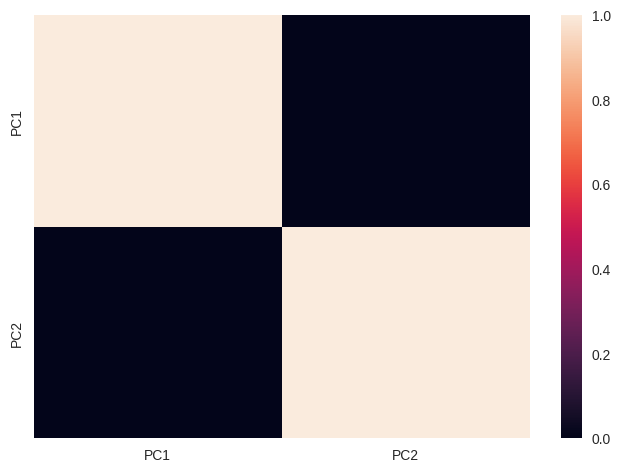

In [49]:
sns.heatmap(data_pca.corr())


4

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/si

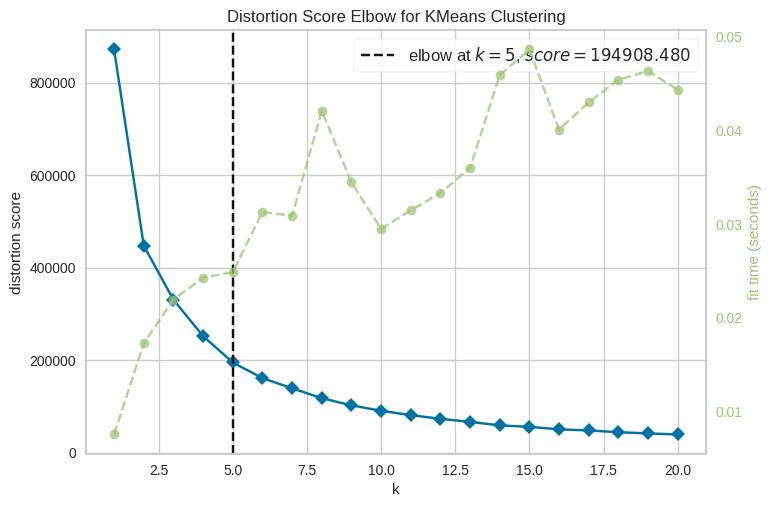

In [51]:
from sklearn.cluster import KMeans
import logging, sys

# # Using the elbow method to find the optimal number of clusters 
# wcss = [] 
# for k in range(1, 21): 
#     kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
#     kmeans.fit(data_pca) 
#     wcss.append(kmeans.inertia_)
    

# plt.plot(range(1, 21), wcss) 
# plt.xlabel('Number of clusters') 

# y_kmeans = kmeans.fit_predict(data_pca)

# plt.ylabel('WCSS') 
# plt.show() # Training the K-Means model on the dataset 
# kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
# logging.disable(sys.maxsize)
# y_kmeans = kmeans.fit_predict(data_pca)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(data_pca) 
visualizer.show()  
best_k_elbow = visualizer.elbow_value_

k=5 is best

5

In [52]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_pca)
    cluster_labels = kmeans.fit_predict(data_pca)
    silhouette_avg.append(silhouette_score(data_pca, cluster_labels))

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/si

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


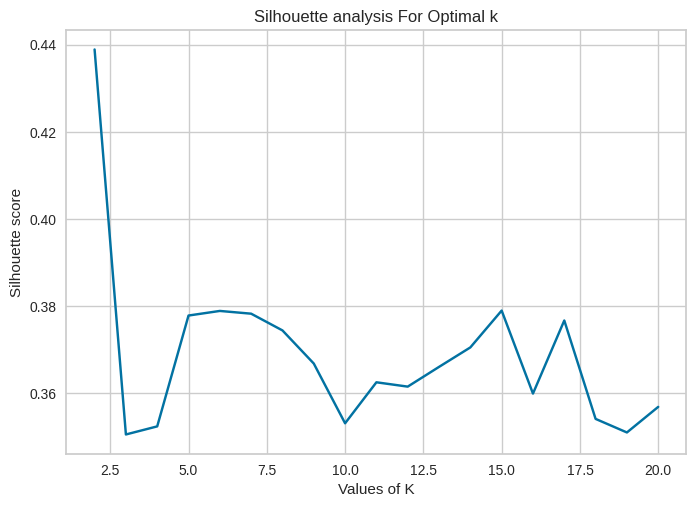

In [53]:
plt.plot([i for i in range(2, 21)],silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

k = 2  is best

6

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


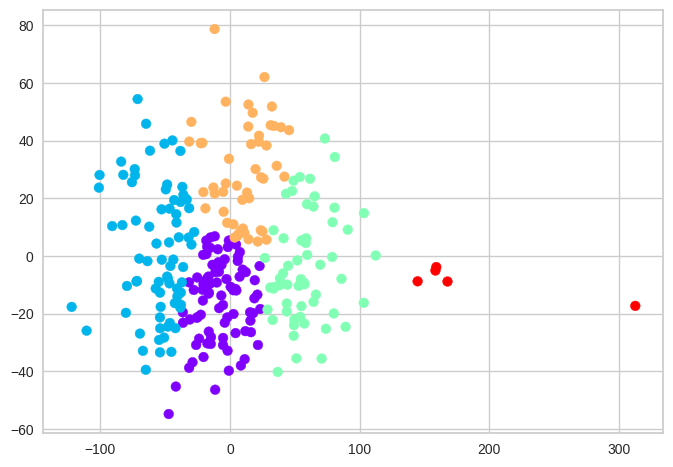

In [54]:
kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
km5 = kmeans_5.fit_predict(data_pca) 
data_with_clusters = data_pca.copy()
data_with_clusters['Clusters'] = kmeans_5.fit_predict(data_pca)
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=data_with_clusters['Clusters'],cmap='rainbow')

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


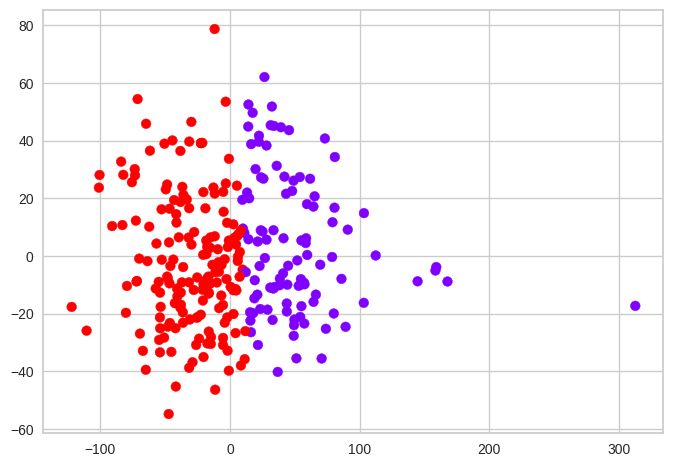

In [55]:
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km2 = kmeans_2.fit_predict(data_pca) 
data_with_clusters = data_pca.copy()
data_with_clusters['Clusters'] = kmeans_2.fit_predict(data_pca)
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=data_with_clusters['Clusters'],cmap='rainbow')

7

Clusters for k=5(elbow):

In [56]:
pd.DataFrame(km5).describe()

,0
count,270.000000
mean,1.329630
std,1.153084
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


Clusters for k=2(siloette):

In [57]:
pd.DataFrame(km2).describe()

,0
count,270.000000
mean,0.622222
std,0.485732
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000
